<ipython-input-227-b935030ca225>:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('objid',1,inplace=True)
<ipython-input-227-b935030ca225>:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('rerun',1,inplace=True)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


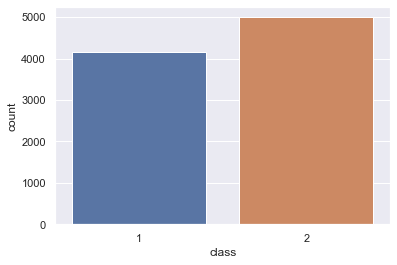

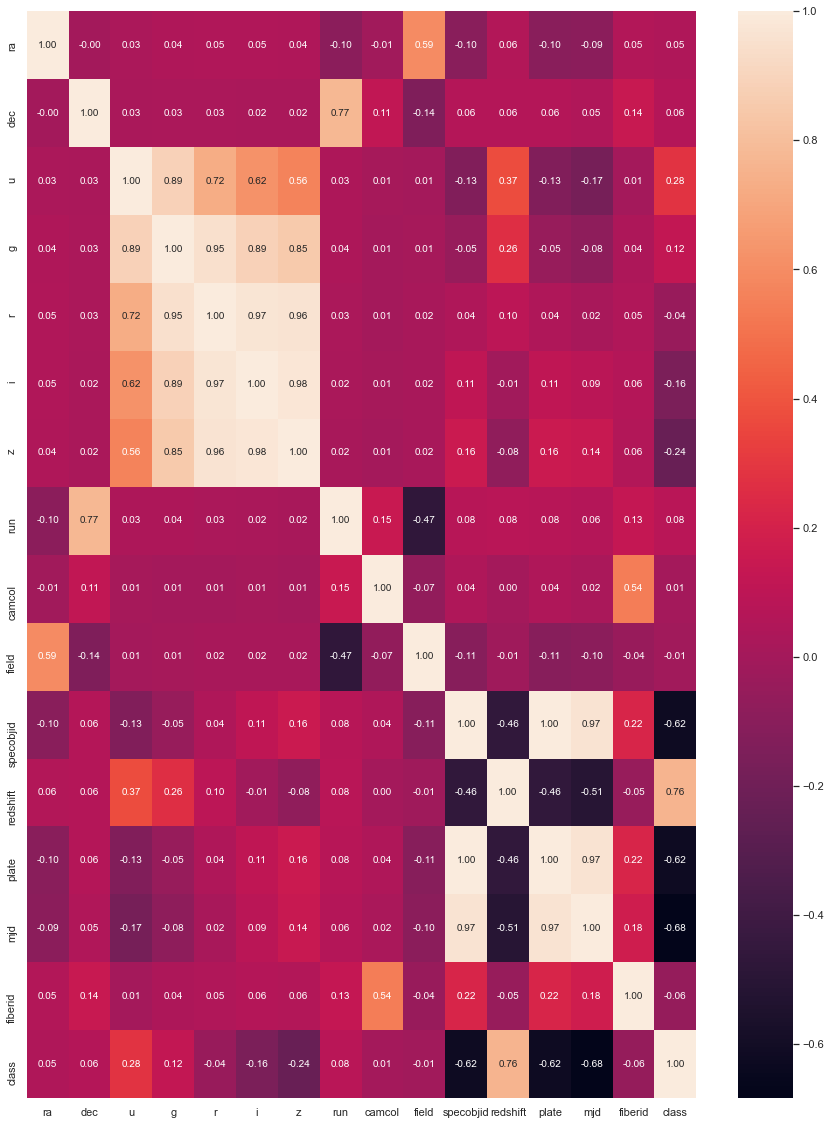

Accuracy Score of GaussianNB() is:
0.9524590163934427


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [227]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from pylab import rcParams

#Reading file and using as dataframe
path="."
filename_read=os.path.join(path, "skyserverv2.csv")
df=pd.read_csv(filename_read)

#df.info()

# dropping obselete features 
df.drop('objid',1,inplace=True) 
df.drop('rerun',1,inplace=True)

#Check for count difference
sns.countplot(df['class'])
df['class'].value_counts()

#Heatmap
def plot_correlation(datab):
    rcParams['figure.figsize']=15,20
    fig= plt.figure()
    sns.heatmap(datab.corr(), annot=True, fmt= ".2f")
    plt.show()
    
plot_correlation(df)

X=df.iloc[:, 15]
y=df.iloc[:,14:15]
X=df.drop(['class'],axis=1)

#Scaling
scale=StandardScaler()
X=scale.fit_transform(X)

#Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Gaussian model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred=y_pred.reshape(1830,1)

#Accuracy
print('Accuracy Score of',gnb,'is:')
print(accuracy_score(y_test,y_pred))
